In [215]:
## Open and Reading Text file containg Symbol and Quality Score
ASC = open("book11.txt",'r')
ASC_score = ASC.readlines()

## Loading and Reading the fastq file 
fastq_score = open("fastq1111.fastq", 'r')
fastq_score_list = fastq_score.readlines()

## Selecting fourth line having phred quality score in ASCII symbols. 
desired_lines = fastq_score_list[3::4]

## Selecting on 50 line to avoid much memory
desired_lines1 =desired_lines[0:10000]

In [216]:
full_score_list = []             

for read in desired_lines1:       

    score_list = []

    read_list = list(read)        # made list of all reads

    for x in read_list:           # for each read in the read_list took the score of Corresponding symbol 
                                  # and repeat it for all the basespresent inthe file
        for i in ASC_score:
            if x == i.strip().split()[1]:

                score_list.append(i.strip().split()[0])

    full_score_list.append(score_list)    # stored all the base score of the file in the list
                            

In [217]:
import pandas as pd
df = pd.DataFrame({'Per Base': desired_lines1,'Quality Score': full_score_list})

In [218]:
df.head()

,Per Base,Quality Score
0,-6A@@ECFEEEGGGGGGGGGGGGGG?FGGGGGGDFDGDEDGEAFCC...,"[12, 21, 32, 31, 31, 36, 34, 37, 36, 36, 36, 3..."
1,-ABCCEDCCCFGGGGGGGGGGGGGFFGGFGGGCEFGDDFDDCFD8F...,"[12, 32, 33, 34, 34, 36, 35, 34, 34, 34, 37, 3..."
2,-6ACC<8ACEGGGGGGGCFGGGFEGGF8E<FFFGG8@@<CDGDC8C...,"[12, 21, 32, 34, 34, 27, 23, 32, 34, 36, 38, 3..."
3,A-A@CFFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGG...,"[32, 12, 32, 31, 34, 37, 37, 38, 38, 38, 38, 3..."
4,-ACCCCAAFGFGCFGGGGGGGCGFF8CFGGGGGGDFFFCEFEFECF...,"[12, 32, 34, 34, 34, 34, 32, 32, 37, 38, 37, 3..."


In [219]:
## Converting each list to Int

full_score_list1 =x = [[int(float(j)) for j in i] for i in full_score_list]

## Mean of each index of list
base_score_mean= [statistics.mean(x) for x in zip(*full_score_list1)]

## Rounding each mean Quality score to nearest integer

base_score_mean_round = [round(x) for x in base_score_mean]


In [220]:
## Renaming the coloumn
import pandas as pd
df1 = pd.DataFrame(base_score_mean_round,columns=['Base_Score'])

In [221]:
df1.head()

,Base_Score
0,34
1,34
2,34
3,34
4,34


In [222]:
df1.insert(0, 'Index', range(0, 0 + len(df1)))

In [223]:
df1.head()

,Index,Base_Score
0,0,34
1,1,34
2,2,34
3,3,34
4,4,34


Median of data-set is : 31 
Mean of data-set is : 28.750830564784053 


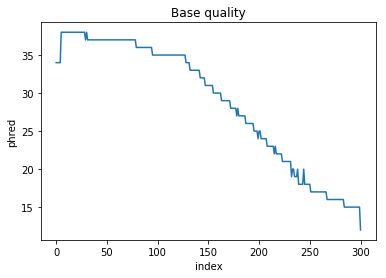

In [227]:
import statistics 
print("Median of data-set is : % s "
        % (statistics.median(base_score_mean_round)))   # Calculate median of the per base quality score which is unaffected 
print("Mean of data-set is : % s "                      # by outliers
        % (statistics.mean(base_score_mean_round)))     # Calculation of mean which is affected by outliers.

import matplotlib.pyplot as plt
x = df1.index                                           # plot for per base quality score as a function of index
y =df1.Base_Score
plt.title('Base quality')
plt.xlabel('index')
plt.ylabel('phred')
plt.plot(x,y) 